In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
sns.set(style="whitegrid")

## Load data

In [29]:
df1 = pd.DataFrame()
for year in range(2012, 2016):
    df_load = pd.read_excel('data/emission-spot-primary-market-auction-report-{}-data.xls'.format(year), skiprows=2)
    if year == 2012:
        df_load.rename(columns={
            'Minimal Price €/tCO2': 'Minimum Bid €/tCO2',
            'Maximal Price €/tCO2': 'Maximum Bid €/tCO2'
        }, inplace=True)
    df1 = pd.concat([df1, df_load])

In [30]:
df1.head()

,Date,Time,Auction Name,Contract,Auction Price €/tCO2,Minimum Bid €/tCO2,Maximum Bid €/tCO2,Mean €/tCO2,Median €/tCO2,Auction Volume tCO2,Total Amount of Bids,Cover Ratio,Total Number of Bidders,Number of Successful Bidders,Total Revenue €,Country,Auction Details
0,2012-12-18,1970-01-01 15:00:38,EU,T3PA,6.45,4.80,8.00,6.32,6.37,5584500,13431000.0,2.41,13.0,9.0,36020025.0,EU,AT: 941.700\nLU: 93.525\nLV: 161.250\nMT: 83.8...
1,2012-12-17,1970-01-01 15:00:30,HU,T2PA,6.29,6.16,6.45,6.29,6.29,1250000,2217000.0,1.77,8.0,8.0,7862500.0,HU,NaN
2,2012-12-14,1970-01-01 11:00:31,DE,T3PA,6.57,6.30,6.70,6.50,6.51,2531000,5805000.0,2.29,10.0,7.0,16628670.0,DE,NaN
3,2012-12-13,1970-01-01 15:00:38,EU,T3PA,6.55,6.00,6.85,6.51,6.53,5515500,13828000.0,2.51,11.0,9.0,36126525.0,EU,AT: 975.950\nSI: 307.850\nSE: 622.250\nRO: 3.4...
4,2012-12-11,1970-01-01 15:00:45,EU,T3PA,6.91,4.50,7.25,6.86,6.91,5515500,15389000.0,2.79,13.0,9.0,38112105.0,EU,AT: 1.029.590\nSI: 324.770\nSE: 656.450\nRO: 3...


In [85]:
df1.shape

(691, 17)

In [67]:
import re
import json

In [92]:
list(df1['Auction Details'][0])[0]

'AT: 941.700\nLU: 93.525\nLV: 161.250\nMT: 83.850\nNL: 2.309.100\nPT: 1.496.400\nRO: 3.470.100\nSE: 619.200\nSI: 322.500\nLT: 461.175\nIT: 6.669.300\nBG: 1.915.650\nCY: 219.300\nDK: 1.067.475\nEL: 2.967.000\nES: 5.966.250\nFI: 1.128.750\nFR: 3.766.800\nHU: 1.296.450\nSK: 1.064.250'

In [94]:
re.sub(r'([a-zA-Z][a-zA-Z]):', '"\1":', list(df1['Auction Details'][0])[0]).replace('.', '').replace('\n', ',')

'"\x01": 941700,"\x01": 93525,"\x01": 161250,"\x01": 83850,"\x01": 2309100,"\x01": 1496400,"\x01": 3470100,"\x01": 619200,"\x01": 322500,"\x01": 461175,"\x01": 6669300,"\x01": 1915650,"\x01": 219300,"\x01": 1067475,"\x01": 2967000,"\x01": 5966250,"\x01": 1128750,"\x01": 3766800,"\x01": 1296450,"\x01": 1064250'

In [80]:
df1['Auction Details'].apply(lambda x: re.sub(r'([a-zA-Z]*):', '"\1":', x).replace('.', '').replace('\n', ',') if isinstance(x, str) else '{}')

0      "": 941700,"": 93525,"": 161250,"": 83850,...
1                                                     {}
2                                                     {}
3      "": 975950,"": 307850,"": 622250,"": 34977...
4      "": 1029590,"": 324770,"": 656450,"": 3689...
                             ...                        
202    "": 314550,"": 1908270,"": 34950,"": 27960...
203    "": 500980,"": 3452700,"": 182790,"": 4062...
204    "": 487660,"": 3360900,"": 177930,"": 3954...
205                                                   {}
206    "": 495800,"": 3417000,"": 180900,"": 4020...
Name: Auction Details, Length: 691, dtype: object

In [63]:
df = pd.DataFrame({'a':[1,2,3], 'b':[{'c':1}, {'d':3}, {'c':5, 'd':6}]})

In [64]:
df

,a,b
0,1,{'c': 1}
1,2,{'d': 3}
2,3,"{'c': 5, 'd': 6}"


In [62]:
pd.DataFrame(df1['Auction Details'].apply(lambda x: list(map(lambda y: {y.split(': ')[0]: y.split(': ')[1].replace('.', '')}, x.split('\n'))) if isinstance(x, str) else [])).tolist()

AttributeError: 'DataFrame' object has no attribute 'tolist'

In [23]:
df2 = pd.read_excel('data/emission-spot-primary-market-auction-report-{}-data.xls'.format(year), skiprows=2)

In [25]:
df2.head()

,Date,Time,Auction Name,Contract,Auction Price €/tCO2,Minimum Bid €/tCO2,Maximum Bid €/tCO2,Mean €/tCO2,Median €/tCO2,Auction Volume tCO2,Total Amount of Bids,Cover Ratio,Total Number of Bidders,Number of Successful Bidders,Total Revenue €,Country,Auction Details
0,2015-12-17,1970-01-01 11:00:22,EU,T3PA,8.12,7.88,8.16,8.07,8.08,2818500,10044000,3.56,18,9,22886220,EU,AT: 101.500\nIT: 3.280.480\nLT: 349.160\nLU: 4...
1,2015-12-15,1970-01-01 11:00:26,EU,T3PA,8.05,7.80,8.60,8.01,8.00,2918000,7381000,2.53,21,13,23489900,EU,AT: 595.700\nIT: 4.105.500\nLT: 217.350\nLU: 4...
2,2015-12-14,1970-01-01 11:00:28,EU,T3PA,7.92,5.00,8.15,7.87,7.94,2918000,5776000,1.98,19,17,23110560,EU,AT: 586.080\nIT: 4.039.200\nLT: 213.840\nLU: 4...
3,2015-12-11,1970-01-01 11:00:48,DE,T3PA,7.98,7.76,8.50,8.04,8.05,3181500,8129500,2.56,18,17,25388370,DE,NaN
4,2015-12-10,1970-01-01 11:00:21,EU,T3PA,8.32,8.14,8.45,8.29,8.30,2918000,10137000,3.47,21,13,24277760,EU,AT: 615.680\nIT: 4.243.200\nLT: 224.640\nLU: 4...


In [16]:
df = pd.DataFrame()
YEARS = ['2017', '2018', '2019', '2020']

for year in YEARS:
    df = pd.concat([
        df,
        pd.read_excel('data/emission-spot-primary-market-auction-report-{}-data.xls'.format(year), skiprows=5)
    ])

In [19]:
df = df.drop(columns=['Unnamed: 0'])

In [20]:
df.head()

,Date,Time,Auction Name,Contract,Auction Price €/tCO2,Minimum Bid €/tCO2,Maximum Bid €/tCO2,Mean €/tCO2,Median €/tCO2,Auction Volume tCO2,...,Poland\n(PL),Portugal\n(PT),Romania\n(RO),Sweden\n(SE),Slovenia\n(SI),Slovakia\n(SK),Iceland\n(IS),Liechtenstein\n(LI),Norway\n(NO),Innovation\nFund
0,2017-12-15,2017-12-15 11:00:25,Auction 3. Period DE,T3PA,7.07,4.25,7.60,6.61,6.98,4481000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-12-14,2017-12-14 11:00:31,Auction 3. Period CAP2-EU,T3PA,6.96,3.00,7.93,6.51,6.91,4273000,...,NaN,835200.0,2658720.0,734280.0,194880.0,389760.0,NaN,NaN,NaN,NaN
2,2017-12-12,2017-12-12 11:00:27,Auction 3. Period CAP2-EU,T3PA,7.37,3.00,7.55,6.79,7.28,4261500,...,NaN,965470.0,2520540.0,486420.0,243210.0,847550.0,NaN,NaN,NaN,NaN
3,2017-12-11,2017-12-11 11:00:24,Auction 3. Period CAP2-EU,T3PA,7.10,4.25,8.00,6.70,7.07,4261500,...,NaN,930100.0,2428200.0,468600.0,234300.0,816500.0,NaN,NaN,NaN,NaN
4,2017-12-08,2017-12-08 11:00:25,Auction 3. Period DE,T3PA,7.24,4.25,7.55,6.68,7.23,4473000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## DataFrame preprocessing

### Rename country columns

In [93]:
df.rename(
    columns={
#         'Innovation\nFund': 'Innovation Fund',
        'Austria\n(AT)': 'Austria',
        'Belgium\n(BE)': 'Belgium',
        'Bulgaria\n(BG)': 'Bulgaria',
        'Croatia\n(HR)': 'Croatia',
        'Cyprus\n(CY)': 'Cyprus',
        'Czech Republic\n(CZ)': 'Czech Republic',
        'Denmark\n(DK)': 'Denmark',
        'Estonia\n(EE)': 'Estonia',
        'Finland\n(FI)': 'Finland',
        'France\n(FR)': 'France',
        'Germany\n(DE)': 'Germany',
        'Greece\n(EL)': 'Greece',
        'Hungary\n(HU)': 'Hungary',
        'Iceland\n(IS)': 'Iceland',
        'Ireland\n(IE)': 'Ireland',
        'Italy\n(IT)': 'Italy',
        'Latvia\n(LV)': 'Latvia',
        'Liechtenstein\n(LI)': 'Liechtenstein',
        'Lithuania\n(LT)': 'Lithuania',
        'Luxembourg\n(LU)': 'Luxembourg',
        'Malta\n(MT)': 'Malta',
        'Netherlands\n(NL)': 'Netherlands',
        'Norway\n(NO)': 'Norway',
        'Poland\n(PL)': 'Poland',
        'Portugal\n(PT)': 'Portugal',
        'Romania\n(RO)': 'Romania',
        'Slovakia\n(SK)': 'Slovakia',
        'Slovenia\n(SI)': 'Slovenia',
        'Spain\n(ES)': 'Spain',
        'Sweden\n(SE)': 'Sweden'
    },
    inplace=True
)

In [155]:
COUNTRIES = [
    'Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark',
    'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland',
    'Italy', 'Latvia', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands',
    'Norway', 'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden'
]

### Check that country columns are in euros (sum all countries for each auction and check equality with column `Total Revenue €`)

In [156]:
pd.DataFrame(df[COUNTRIES] \
.sum(axis=1)) \
.reset_index() \
.merge(pd.DataFrame(df['Total Revenue €'].reset_index()), left_index=True, right_index=True) \
.head()

,index_x,0,index_y,Total Revenue €
0,0,31680670.0,0,31680670
1,1,29740080.0,1,29740080
2,2,31407255.0,2,31407255
3,3,30256650.0,3,30256650
4,4,32384520.0,4,32384520


### Convert country revenue to volume

In [163]:
for country in COUNTRIES:
    df['{} (volume)'.format(country)] = df[country] / df['Auction Price €/tCO2']

### Check that country volumes sum up to `Auction Volume tCO2`

In [167]:
pd.DataFrame(df[list(map(lambda x: '{} (volume)'.format(x), COUNTRIES))] \
.sum(axis=1)) \
.reset_index() \
.merge(pd.DataFrame(df['Auction Volume tCO2'].reset_index()), left_index=True, right_index=True) \
.head()

,index_x,0,index_y,Auction Volume tCO2
0,0,4481000.0,0,4481000
1,1,4273000.0,1,4273000
2,2,4261500.0,2,4261500
3,3,4261500.0,3,4261500
4,4,4473000.0,4,4473000


### Country volume

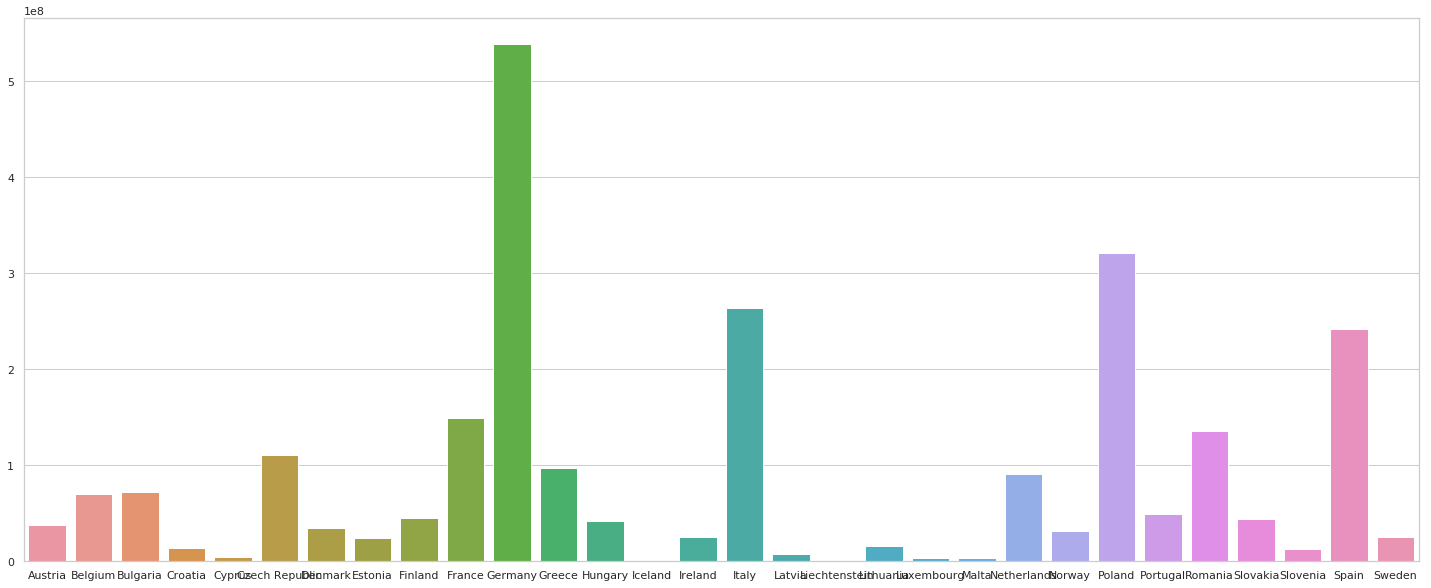

In [171]:
plt.figure(figsize=(25,10))
sns.barplot(x=COUNTRIES, y=[df['{} (volume)'.format(country)].sum() for country in COUNTRIES])

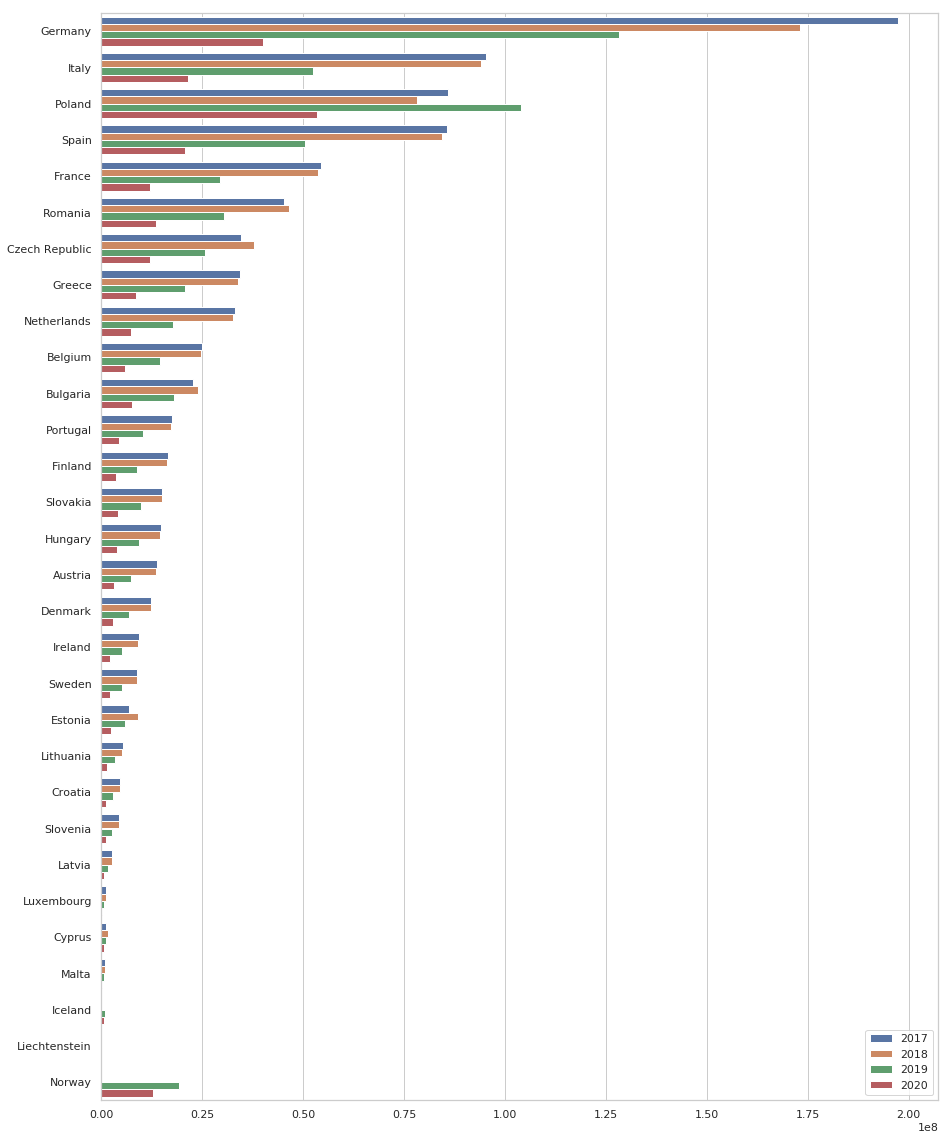

In [196]:
plt.figure(figsize=(15,20))
sns.barplot(
    y=[country for year in YEARS for country in COUNTRIES],
    x=[df[df['Time'].dt.year == int(year)]['{} (volume)'.format(country)].sum() for year in YEARS for country in COUNTRIES],
    hue=[year for year in YEARS for country in COUNTRIES],
    order=list(map(lambda x: x['country'],
                   sorted([{"s": df[df['Time'].dt.year == 2017]['{} (volume)'.format(country)].sum(), "country": country} for country in COUNTRIES], key=lambda x: x['s'], reverse=True)))
)

### Explore columns with meaningful info

In [164]:
df[[
#     'Auction Name',
    'Auction Price €/tCO2',
    'Auction Volume tCO2',
    'Average bid size',
    'Average number of bids per bidder',
    'Average volume bid per bidder',
    'Average volume won per bidder',
#     'Contract',
#     'Country',
    'Cover Ratio',
#     'Date',
    'Maximum Bid €/tCO2',
    'Mean €/tCO2',
    'Median €/tCO2',
    'Minimum Bid €/tCO2',
    'Number of Successful Bidders',
    'Number of bids submitted',
    'Number of successful bids',
    'Standard deviation of bid volume per bidder',
    'Standard deviation of volume won per bidder',
#     'Time',
    'Total Amount of Bids',
    'Total Number of Bidders',
    'Total Revenue €'
]].head()

,Auction Price €/tCO2,Auction Volume tCO2,Average bid size,Average number of bids per bidder,Average volume bid per bidder,Average volume won per bidder,Cover Ratio,Maximum Bid €/tCO2,Mean €/tCO2,Median €/tCO2,Minimum Bid €/tCO2,Number of Successful Bidders,Number of bids submitted,Number of successful bids,Standard deviation of bid volume per bidder,Standard deviation of volume won per bidder,Total Amount of Bids,Total Number of Bidders,Total Revenue €
0,7.07,4481000,134537,5.22,702583,373417,2.82,7.60,6.61,6.98,4.25,12,94,19,843151,404620,12646500,18,31680670
1,6.96,4273000,105325,5.58,587605,267063,2.61,7.93,6.51,6.91,3.00,16,106,33,814864,418328,11164500,19,29740080
2,7.37,4261500,118346,5.06,598306,426150,2.53,7.55,6.79,7.28,3.00,10,91,24,781804,499599,10769500,18,31407255
3,7.10,4261500,103956,4.43,461022,213075,2.49,8.00,6.70,7.07,4.25,20,102,37,679646,334827,10603500,23,30256650
4,7.24,4473000,108442,4.31,467656,344077,1.67,7.55,6.68,7.23,4.25,13,69,29,492954,436809,7482500,16,32384520


GUESS: `Total Amount of Bids` = total volume in tCO2 of submitted bids

## Auction revenues over time

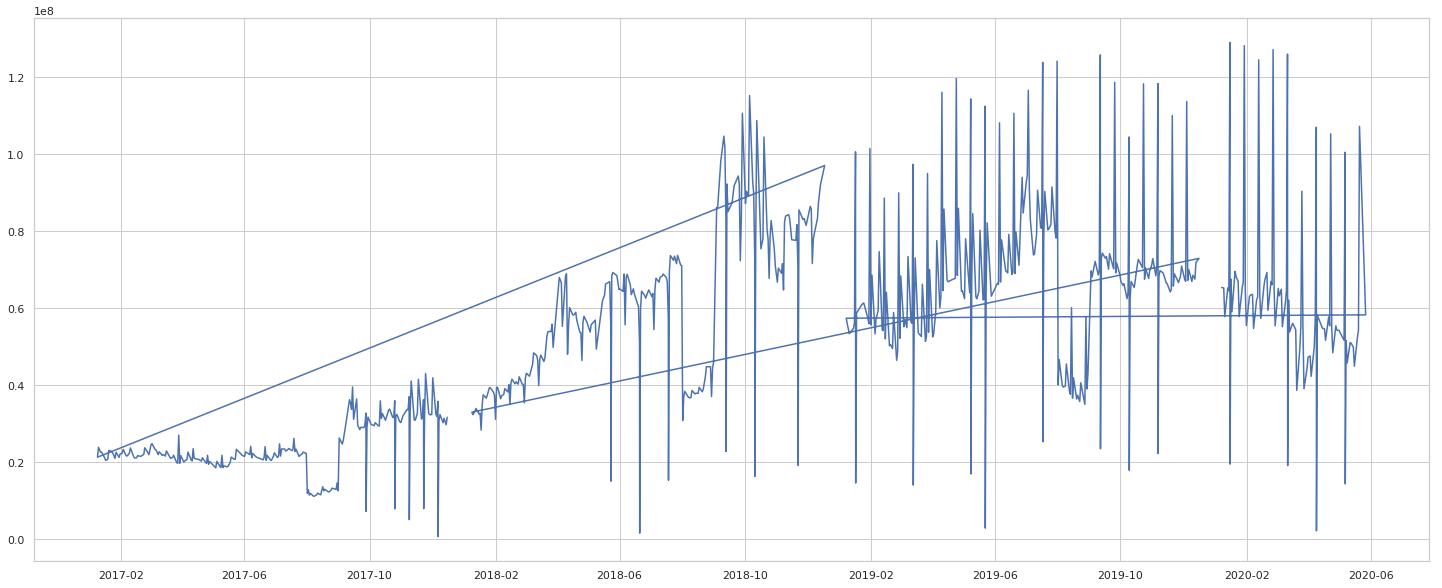

In [6]:
plt.figure(figsize=(25,10))
plt.plot(df['Time'], df['Total Revenue €'])

This dataset seems to have different types of auctions

## Auction type study

### Column exploration

In [22]:
df.groupby('Contract')['Time'].count()

Contract
EAA3     23
T3PA    695
Name: Time, dtype: int64

In [9]:
df.groupby('Country')['Time'].count()

Country
DE    150
EU    488
PL     80
Name: Time, dtype: int64

### Revenues over time in clusters

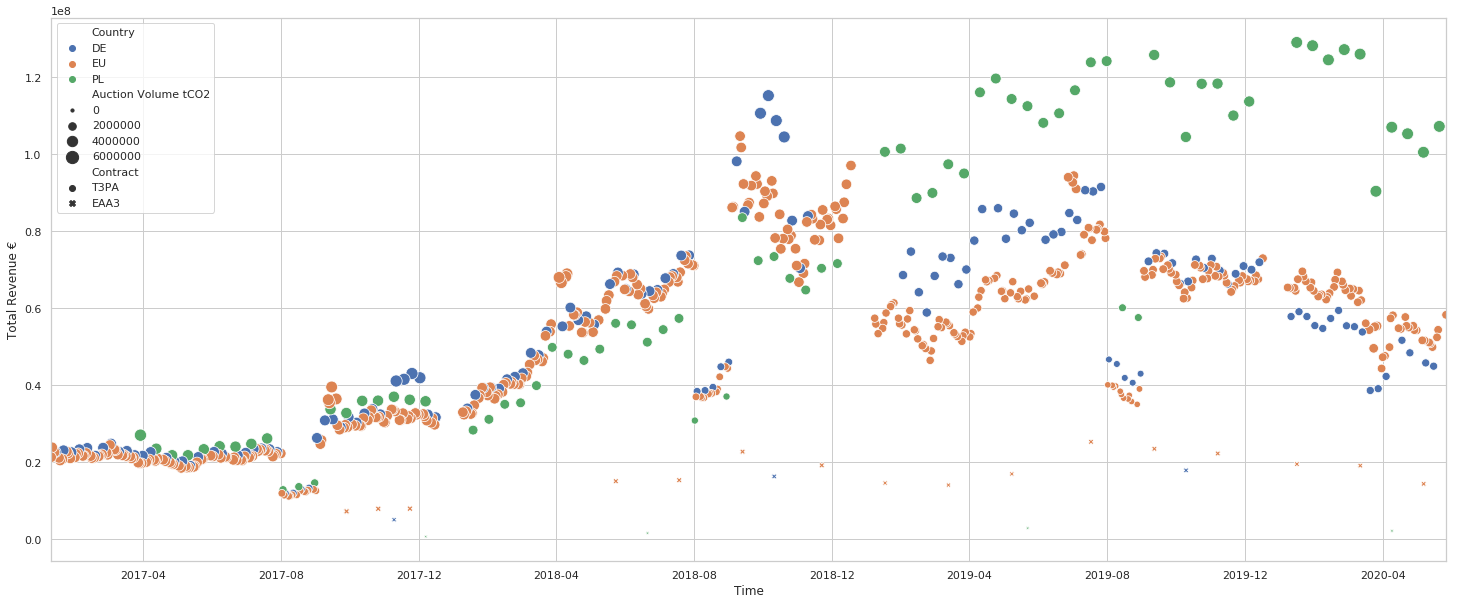

In [34]:
plt.figure(figsize=(25,10))
ax = sns.scatterplot(x='Time', y='Total Revenue €', hue='Country', style='Contract', size='Auction Volume tCO2', sizes=(10, 150), data=df)
ax.set_xlim([df['Time'].min(), df['Time'].max()])
plt.show()

### Price over time

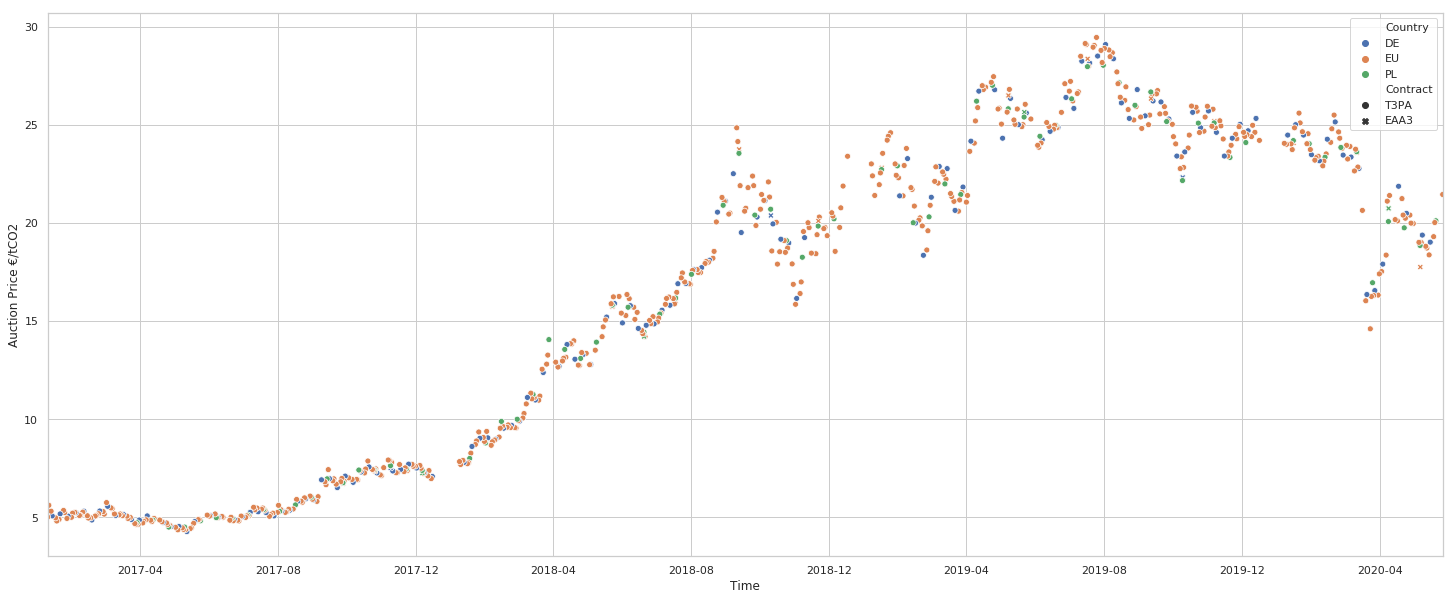

In [204]:
plt.figure(figsize=(25,10))
ax = sns.scatterplot(x='Time', y='Auction Price €/tCO2', hue='Country', style='Contract', data=df)
ax.set_xlim([df['Time'].min(), df['Time'].max()])
plt.show()

Count total CO2 volume auctionned in 2019 (should be 3 Gt according to https://ourworldindata.org/co2-and-other-greenhouse-gas-emissions)

Here, we do : total_volume / 45% (40% credits are auctionned) / 40% (40% GHGE in EU are covered by the ETS)

In [50]:
df[df['Date'].dt.year == 2019]['Auction Volume tCO2'].sum() * 100 / 45 * 100 / 45

2933543209.876543

### Number of bidders over time

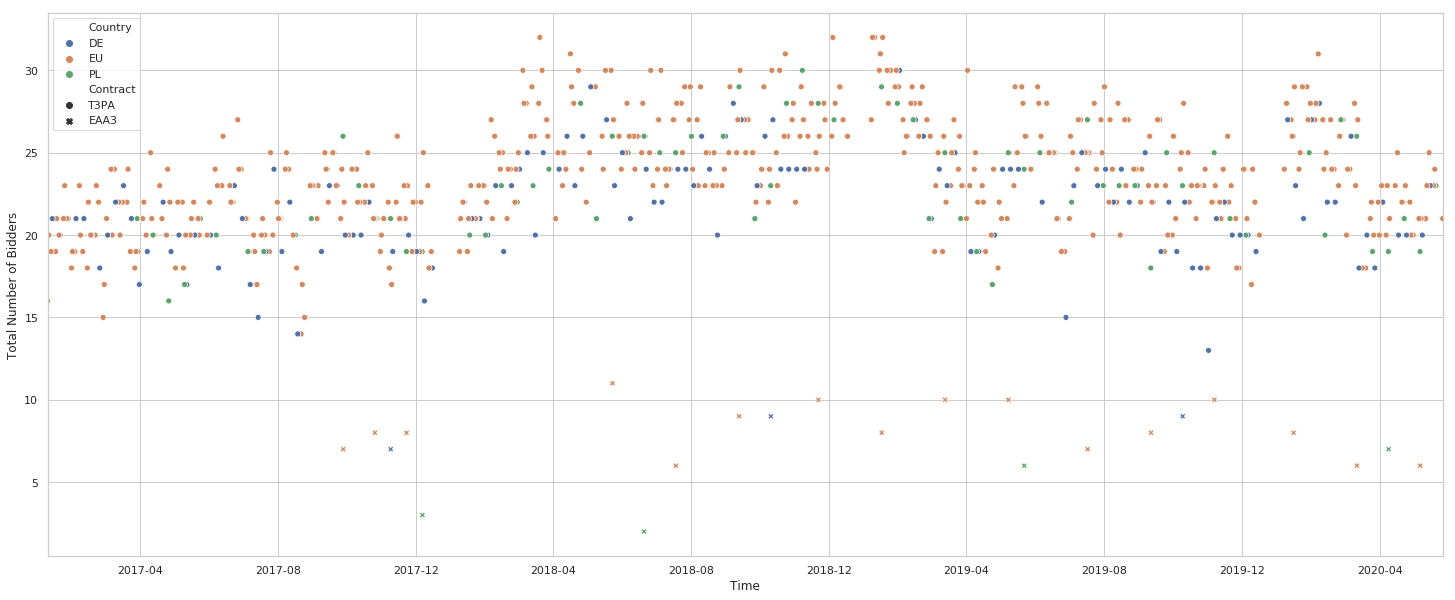

In [203]:
plt.figure(figsize=(25,10))
ax = sns.scatterplot(x='Time', y='Total Number of Bidders', hue='Country', style='Contract', data=df)
ax.set_xlim([df['Time'].min(), df['Time'].max()])
plt.show()

### Amount of bids (volume)

Compare `Total Amount of Bids` with `Auction Volume tCO2`

My guess is that `Auction Volume tCO2` is the volume it tCO2 available during auction, while `Total Amount of Bids` is the total volume in tCO2 of submitted bids

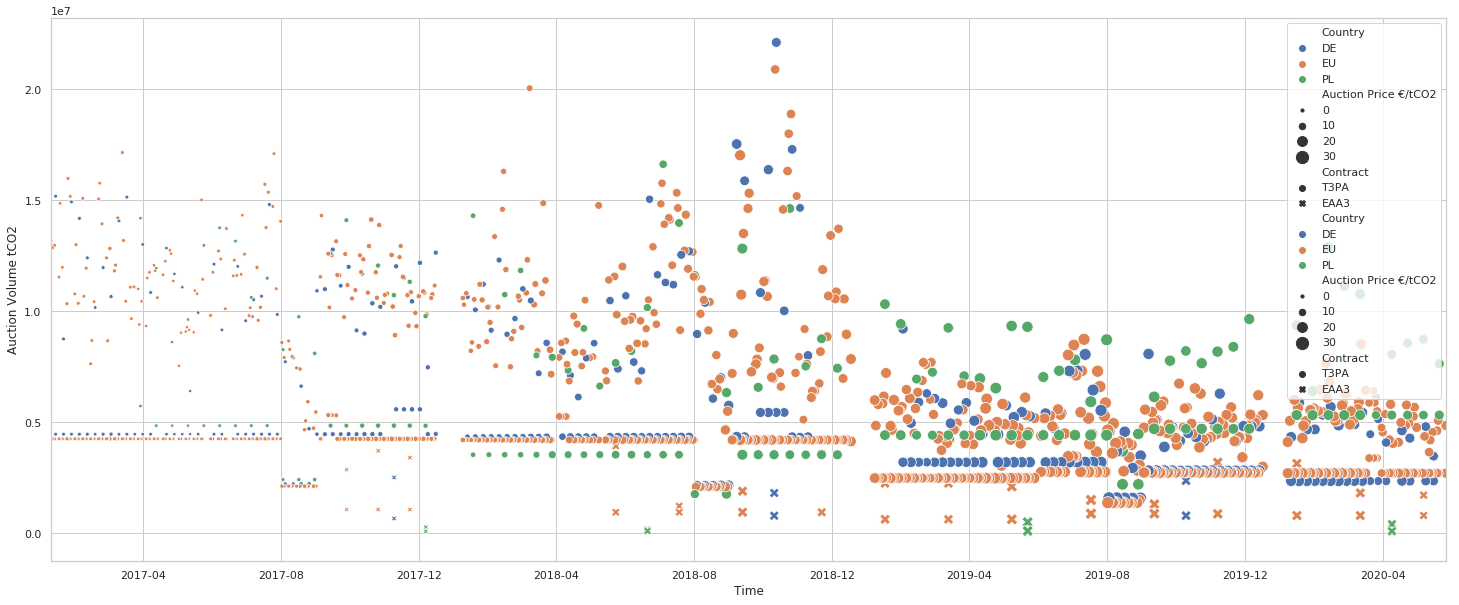

In [210]:
plt.figure(figsize=(25,10))
ax = sns.scatterplot(x='Time', y='Total Amount of Bids', hue='Country', style='Contract', size='Auction Price €/tCO2', sizes=(10, 150), data=df)
sns.scatterplot(x='Time', y='Auction Volume tCO2', hue='Country', style='Contract', size='Auction Price €/tCO2', sizes=(10, 150), data=df, ax=ax)
ax.set_xlim([df['Time'].min(), df['Time'].max()])
plt.show()

## Bid analysis

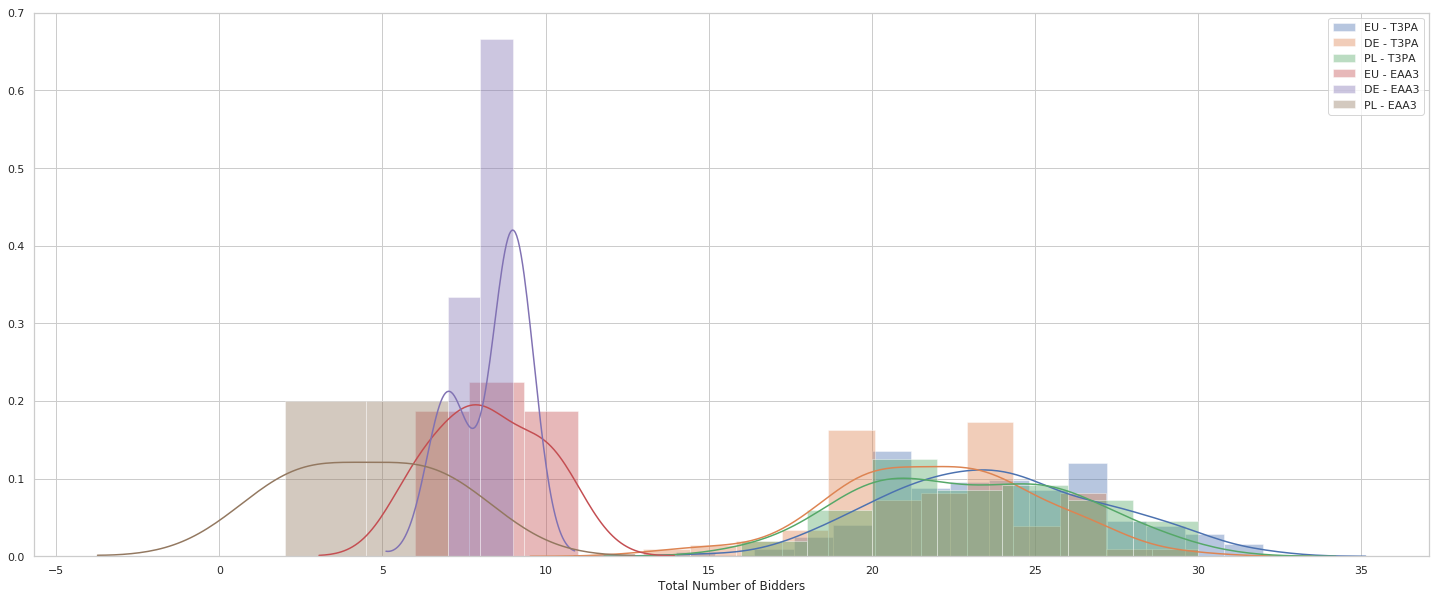

In [110]:
plt.figure(figsize=(25,10))
for contract in df['Contract'].value_counts().index:
    for country in df['Country'].value_counts().index:
        sns.distplot(
            df[(df['Country'] == country) & (df['Contract'] == contract)]['Total Number of Bidders'],
            kde=True,
            label='{} - {}'.format(country, contract)
        )

plt.legend()
plt.show()

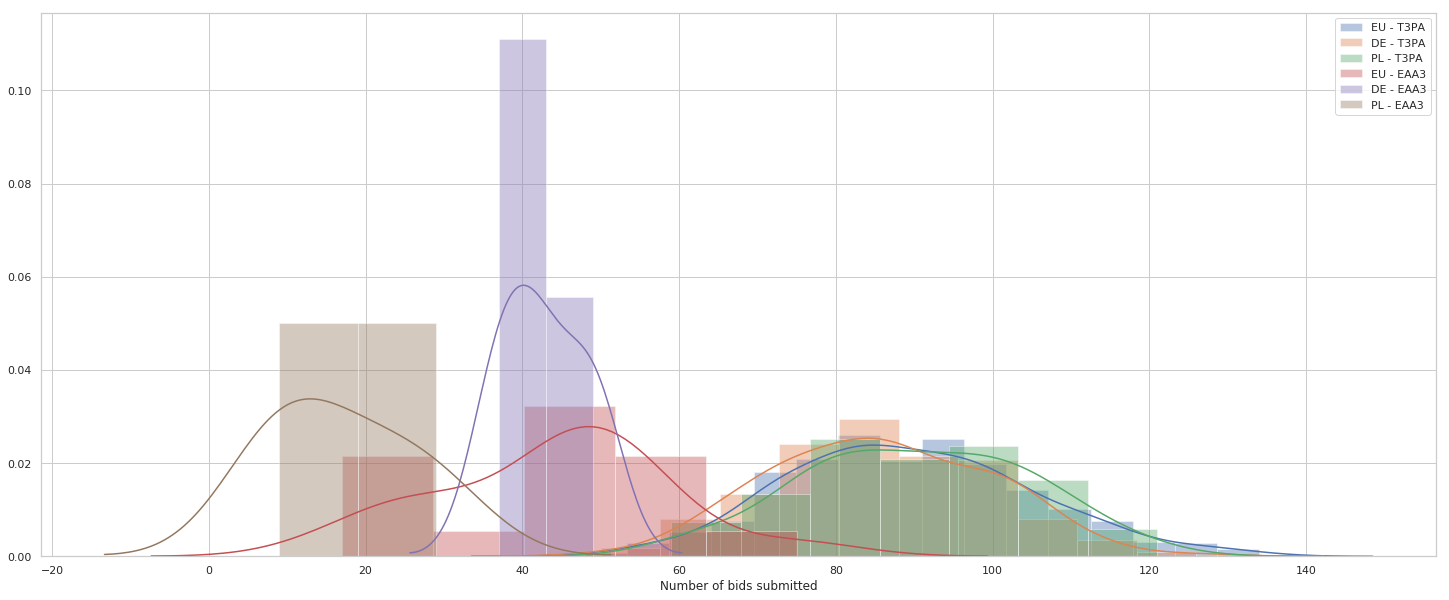

In [109]:
plt.figure(figsize=(25,10))
for contract in df['Contract'].value_counts().index:
    for country in df['Country'].value_counts().index:
        sns.distplot(
            df[(df['Country'] == country) & (df['Contract'] == contract)]['Number of bids submitted'],
            kde=True,
            label='{} - {}'.format(country, contract)
        )

plt.legend()
plt.show()